### Google 드라이브 마운트하기

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 데이터 가져오기

In [5]:
import pandas as pd
# 데이터프레임을 표시할 때 최대 100개의 열까지 표시하도록 설정
pd.set_option('display.max_columns', 100)

# pandasの表示オプション設定（小数点以下3位まで）
pd.options.display.float_format = '{:.3f}'.format

In [6]:
employee_data = pd.read_csv("/content/drive/MyDrive/인공지능공학_Project/IBM HR Attrition Data.csv")
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 모델 구축 및 튜닝 과정 상세 설명

### 데이터 전처리

In [7]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# EmployeeCount, Over18, StandardHours는 분석에 불필요　때문에 컬럼 삭제
employee_data = employee_data.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'])

#### 원-핫 인코딩

In [9]:
employee_data_encoded = employee_data.copy()

In [10]:
employee_data_encoded = pd.get_dummies(employee_data, drop_first=True, dtype=int)

In [11]:
# 인코딩 확인
employee_data_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


#### 표준화

In [12]:
# 표준화를 위해 클래스를 불러오기
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# X와 y를 설정
X = employee_data_encoded.drop("Attrition_Yes", axis=1)
y = employee_data_encoded["Attrition_Yes"]

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# 표준화 처리
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


### 모델 구축

In [13]:
# 혼동 행렬 라이브러리 불러오기
from sklearn.metrics import confusion_matrix

# 여러 모델 불러오기
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 사용할 여러 모델을 딕셔너리로 정의
models = {
    "MLP": MLPClassifier(random_state=0),
    "Logistic Regression": LogisticRegression(random_state=0),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0)
}

# 모델 구축
for model_name, model in models.items():
    model.fit(X_train_std, y_train)

    print("model name:", model_name)
    print("train score:", model.score(X_train_std, y_train))
    print("test score:", model.score(X_test_std, y_test))

    y_pred = model.predict(X_test_std)
    m = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix:\n{m.T}")
    print("--------------------------------------")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


model name: MLP
train score: 1.0
test score: 0.8503401360544217
Confusion matrix:
[[235  32]
 [ 12  15]]
--------------------------------------
model name: Logistic Regression
train score: 0.8928571428571429
test score: 0.8809523809523809
Confusion matrix:
[[243  31]
 [  4  16]]
--------------------------------------
model name: Decision Tree
train score: 1.0
test score: 0.7891156462585034
Confusion matrix:
[[219  34]
 [ 28  13]]
--------------------------------------
model name: Random Forest
train score: 1.0
test score: 0.8537414965986394
Confusion matrix:
[[247  43]
 [  0   4]]
--------------------------------------
model name: SVM
train score: 0.9200680272108843
test score: 0.8503401360544217
Confusion matrix:
[[245  42]
 [  2   5]]
--------------------------------------
model name: K-Nearest Neighbors
train score: 0.8724489795918368
test score: 0.8333333333333334
Confusion matrix:
[[242  44]
 [  5   3]]
--------------------------------------


#### MLP로 선택 및 튜닝

In [25]:
model = MLPClassifier(random_state=0)

model.fit(X_train_std, y_train)

print("model name: MLPClassificatin")
print("train score:", model.score(X_train_std, y_train))
print("test score:", model.score(X_test_std, y_test))

y_pred = model.predict(X_test_std)
m = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{m.T}")

model name: MLPClassificatin
train score: 1.0
test score: 0.8503401360544217
Confusion matrix:
[[235  32]
 [ 12  15]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


하이퍼 매개변수 최적화에 걸린 시간은 195.9749572277069 초입니다.



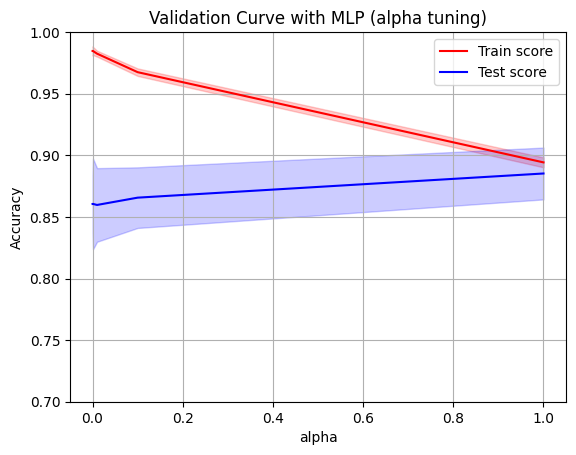

In [13]:
# alpha를 validation_curve로 시각화 및 튜닝

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.neural_network import MLPClassifier
import time

# 퍼센트론을 교차 검증으로 성능 평가 (소요 시간 측정 포함)
start = time.time()  # 시작 시간
mlp = MLPClassifier(learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd')
# alpha에 대한 값의 범위를 설정 (예: 0.0001 부터 1까지)
prange = [0.0001, 0.001, 0.01, 0.1, 1]

train_score, test_score = validation_curve(
    mlp, X_train_std, y_train, param_name="alpha", param_range=prange, cv=10, scoring="accuracy", n_jobs=4
)

end = time.time()  # 끝난 시간
print("하이퍼 매개변수 최적화에 걸린 시간은", end - start, "초입니다.\n")

# 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

# 성능 그래프 그리기
plt.plot(prange, train_mean, label="Train score", color="r")
plt.plot(prange, test_mean, label="Test score", color="b")
plt.fill_between(prange, train_mean - train_std, train_mean + train_std, alpha=0.2, color="r")
plt.fill_between(prange, test_mean - test_std, test_mean + test_std, alpha=0.2, color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP (alpha tuning)")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(axis="both")
plt.show()


하이퍼 매개변수 최적화에 걸린 시간은 229.19319534301758 초입니다.



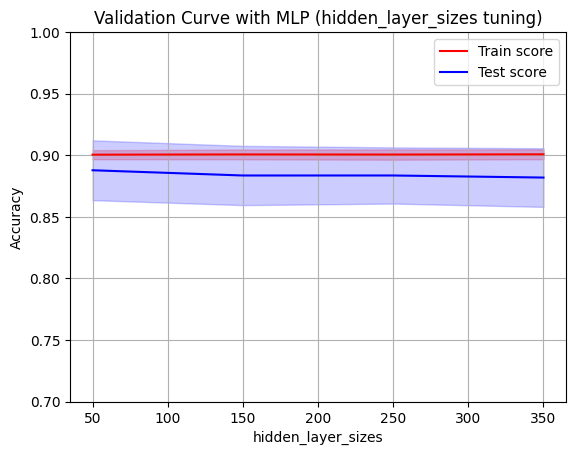

In [20]:
# hidden_layer_sizes를 validation_curve로 시각화 및 튜닝

# 퍼센트론을 교차 검증으로 성능 평가 (소요 시간 측정 포함)
start = time.time()  # 시작 시간
mlp = MLPClassifier(learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd', alpha=0.8)

# hidden_layer_sizes에 대한 값의 범위를 설정 (예: 50 부터 950까지 100씩 증가)
prange = range(50, 450, 100)

train_score, test_score = validation_curve(
    mlp, X_train_std, y_train, param_name="hidden_layer_sizes", param_range=prange, cv=10, scoring="accuracy", n_jobs=4
)

end = time.time()  # 끝난 시간
print("하이퍼 매개변수 최적화에 걸린 시간은", end - start, "초입니다.\n")

# 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

# 성능 그래프 그리기
plt.plot(prange, train_mean, label="Train score", color="r")
plt.plot(prange, test_mean, label="Test score", color="b")
plt.fill_between(prange, train_mean - train_std, train_mean + train_std, alpha=0.2, color="r")
plt.fill_between(prange, test_mean - test_std, test_mean + test_std, alpha=0.2, color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP (hidden_layer_sizes tuning)")
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(axis="both")
plt.show()

In [26]:
model = MLPClassifier(learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd', alpha=1)

model.fit(X_train_std, y_train)

print("model name: MLPClassificatin")
print("train score:", model.score(X_train_std, y_train))
print("test score:", model.score(X_test_std, y_test))

y_pred = model.predict(X_test_std)
m = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{m.T}")

model name: MLPClassificatin
train score: 0.9022108843537415
test score: 0.8707482993197279
Confusion matrix:
[[245  36]
 [  2  11]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


하이퍼 매개변수 최적화에 걸린 시간은 212.9139096736908 초입니다.



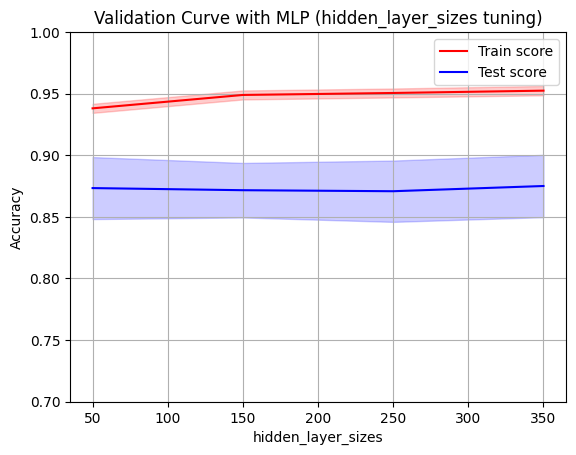

In [27]:
# hidden_layer_sizes를 validation_curve로 시각화 및 튜닝

# 퍼센트론을 교차 검증으로 성능 평가 (소요 시간 측정 포함)
start = time.time()  # 시작 시간
mlp = MLPClassifier(hidden_layer_sizes=50, learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd', alpha=0.2)

# hidden_layer_sizes에 대한 값의 범위를 설정
prange = range(50, 450, 100)

train_score, test_score = validation_curve(
    mlp, X_train_std, y_train, param_name="hidden_layer_sizes", param_range=prange, cv=10, scoring="accuracy", n_jobs=4
)

end = time.time()  # 끝난 시간
print("하이퍼 매개변수 최적화에 걸린 시간은", end - start, "초입니다.\n")

# 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

# 성능 그래프 그리기
plt.plot(prange, train_mean, label="Train score", color="r")
plt.plot(prange, test_mean, label="Test score", color="b")
plt.fill_between(prange, train_mean - train_std, train_mean + train_std, alpha=0.2, color="r")
plt.fill_between(prange, test_mean - test_std, test_mean + test_std, alpha=0.2, color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP (hidden_layer_sizes tuning)")
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(axis="both")
plt.show()

하이퍼 매개변수 최적화에 걸린 시간은 51.490904331207275 초입니다.



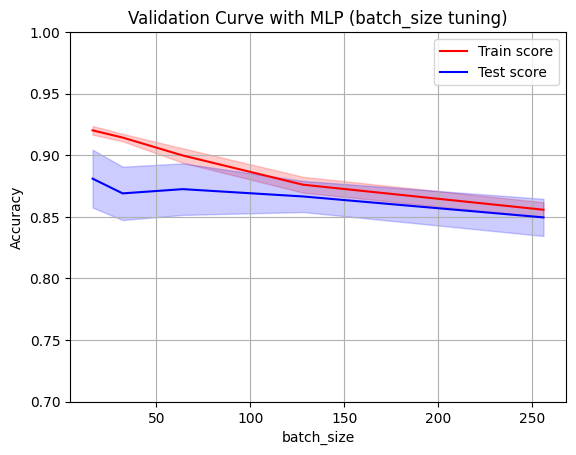

In [28]:
# batch_size를 validation_curve로 시각화 및 튜닝

# 퍼센트론을 교차 검증으로 성능 평가 (소요 시간 측정 포함)
start = time.time()  # 시작 시간
mlp = MLPClassifier(hidden_layer_sizes=50, learning_rate_init=0.001, max_iter=100, solver='sgd', alpha=0.2)

# batch_size에 대한 값의 범위를 설정
batch_size_range = [16, 32, 64, 128, 256]

train_score, test_score = validation_curve(
    mlp, X_train_std, y_train, param_name="batch_size", param_range=batch_size_range, cv=10, scoring="accuracy", n_jobs=4
)

end = time.time()  # 끝난 시간
print("하이퍼 매개변수 최적화에 걸린 시간은", end - start, "초입니다.\n")

# 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

# 성능 그래프 그리기
plt.plot(batch_size_range, train_mean, label="Train score", color="r")
plt.plot(batch_size_range, test_mean, label="Test score", color="b")
plt.fill_between(batch_size_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="r")
plt.fill_between(batch_size_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP (batch_size tuning)")
plt.xlabel("batch_size")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(axis="both")
plt.show()


하이퍼 매개변수 최적화에 걸린 시간은 193.6248118877411 초입니다.



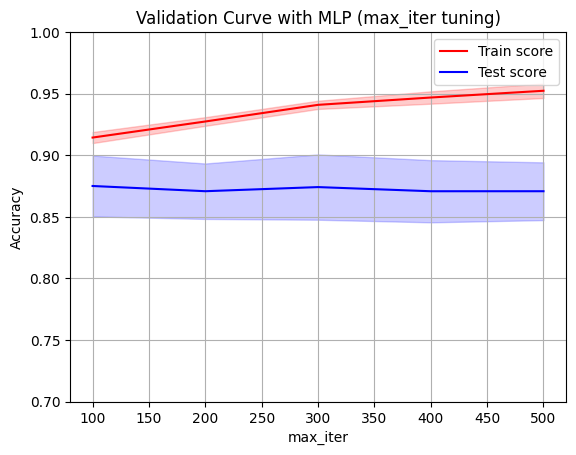

In [23]:
# max_iter를 validation_curve로 시각화 및 튜닝

# 퍼센트론을 교차 검증으로 성능 평가 (소요 시간 측정 포함)
start = time.time()  # 시작 시간
mlp = MLPClassifier(hidden_layer_sizes=50, learning_rate_init=0.001, batch_size=32, solver='sgd', alpha=0.2)

# max_iter에 대한 값의 범위를 설정
max_iter_range = [100, 200, 300, 400, 500]

train_score, test_score = validation_curve(
    mlp, X_train_std, y_train, param_name="max_iter", param_range=max_iter_range, cv=10, scoring="accuracy", n_jobs=4
)

end = time.time()  # 끝난 시간
print("하이퍼 매개변수 최적화에 걸린 시간은", end - start, "초입니다.\n")

# 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

# 성능 그래프 그리기
plt.plot(max_iter_range, train_mean, label="Train score", color="r")
plt.plot(max_iter_range, test_mean, label="Test score", color="b")
plt.fill_between(max_iter_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="r")
plt.fill_between(max_iter_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP (max_iter tuning)")
plt.xlabel("max_iter")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(axis="both")
plt.show()


하이퍼 매개변수 최적화에 걸린 시간은 45.58455157279968 초입니다.



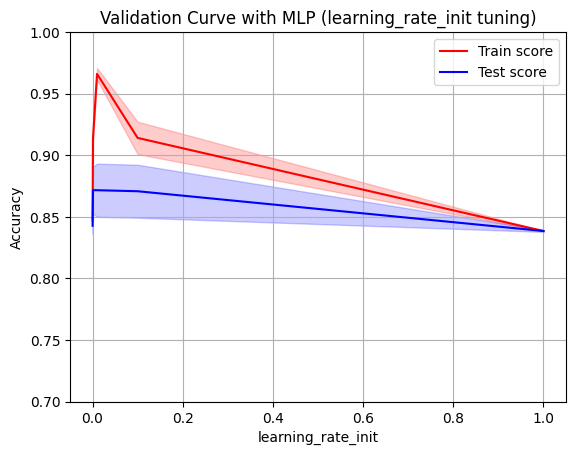

In [31]:
# learning_rate_init를 validation_curve로 시각화 및 튜닝

# 퍼센트론을 교차 검증으로 성능 평가 (소요 시간 측정 포함)
start = time.time()  # 시작 시간
mlp = MLPClassifier(hidden_layer_sizes=50, learning_rate_init=0.001, batch_size=32, max_iter=100, solver='sgd', alpha=0.2)

# learning_rate_init에 대한 값의 범위를 설정
learning_rate_range = [0.0001, 0.001, 0.01, 0.1, 1]

train_score, test_score = validation_curve(
    mlp, X_train_std, y_train, param_name="learning_rate_init", param_range=learning_rate_range, cv=10, scoring="accuracy", n_jobs=4
)

end = time.time()  # 끝난 시간
print("하이퍼 매개변수 최적화에 걸린 시간은", end - start, "초입니다.\n")

# 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

# 성능 그래프 그리기
plt.plot(learning_rate_range, train_mean, label="Train score", color="r")
plt.plot(learning_rate_range, test_mean, label="Test score", color="b")
plt.fill_between(learning_rate_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="r")
plt.fill_between(learning_rate_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP (learning_rate_init tuning)")
plt.xlabel("learning_rate_init")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(axis="both")
plt.show()


In [32]:
mlp = MLPClassifier(hidden_layer_sizes=50, learning_rate_init=0.1, batch_size=32, max_iter=100, solver='sgd', alpha=0.2)


model.fit(X_train_std, y_train)

print("model name: MLPClassifier")
print("train score:", model.score(X_train_std, y_train))
print("test score:", model.score(X_test_std, y_test))

y_pred = model.predict(X_test_std)
m = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{m.T}")

model name: MLPClassifier
train score: 0.9005102040816326
test score: 0.8707482993197279
Confusion matrix:
[[245  36]
 [  2  11]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
# 사용할 여러 모델을 딕셔너리로 정의
models = {
    "MLP (기본 설정)": MLPClassifier(random_state=0),
    "MLP 튜닝1 (alpha=1 조정)": MLPClassifier(learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd', alpha=1, random_state=0),
    "MLP 튜닝2 (전체 조정)": MLPClassifier(hidden_layer_sizes=50, learning_rate_init=0.1, batch_size=32, max_iter=100, solver='sgd', alpha=0.2)
}

# 모델 구축
for model_name, model in models.items():
    model.fit(X_train_std, y_train)

    print("model name:", model_name)
    print("train score:", model.score(X_train_std, y_train))
    print("test score:", model.score(X_test_std, y_test))

    y_pred = model.predict(X_test_std)
    m = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix:\n{m.T}")
    print("--------------------------------------")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


model name: MLP (기본 설정)
train score: 1.0
test score: 0.8503401360544217
Confusion matrix:
[[235  32]
 [ 12  15]]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


model name: MLP 튜닝1 (alpha=1 조정)
train score: 0.9005102040816326
test score: 0.8707482993197279
Confusion matrix:
[[245  36]
 [  2  11]]
--------------------------------------
model name: MLP 튜닝2 (전체 조정)
train score: 0.95578231292517
test score: 0.8469387755102041
Confusion matrix:
[[238  36]
 [  9  11]]
--------------------------------------


### 중요 특징량을 추출합니다.

In [26]:
model = RandomForestClassifier(n_estimators=25, max_depth=10, min_samples_split=5, min_samples_leaf=2,
                               max_features='sqrt', random_state=0)

model.fit(X_train_std, y_train)

print("model name: RandomForest")
print("train score:", model.score(X_train_std, y_train))
print("test score:", model.score(X_test_std, y_test))

y_pred = model.predict(X_test_std)
m = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{m.T}")

model name: RandomForest
train score: 0.9413265306122449
test score: 0.8639455782312925
Confusion matrix:
[[246  39]
 [  1   8]]


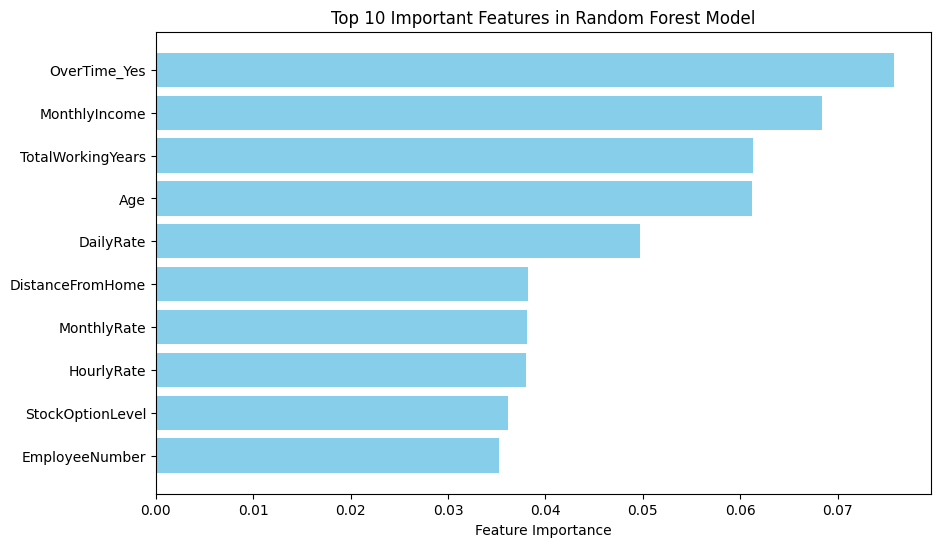

In [41]:
import matplotlib.pyplot as plt

# 특징 중요도 가져오기
feature_importances = model.feature_importances_

# 특징 이름 설정 (DataFrame일 경우 열 이름, 아니면 기본 인덱스 사용)
feature_names = X_train.columns

# 특징 이름과 중요도를 결합하여 표시
feature_importance_dict = dict(zip(feature_names, feature_importances))

# 특징 중요도를 내림차순으로 정렬
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# 시각화 (상위 10개 특징)
top_features = sorted_features[:10]
top_feature_names, top_feature_importances = zip(*top_features)

plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()


In [38]:
X_train.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRol